In [4]:
import xml.etree.ElementTree as ET
import pandas as pd
import os

# Paths to the XML and CSV files
xml_path = r"C:\Users\rajve\Downloads\archive\annotations.xml"
csv_path = r"C:\Users\rajve\Downloads\archive\basketball_tracking.csv"
base_path = r"C:\Users\rajve\Downloads\archive"

# Load and parse the XML file
root = ET.parse(xml_path).getroot()

# Load the CSV file into a DataFrame
image_df = pd.read_csv(csv_path)

data = [
    [
        image_df.loc[image_df['image_id'] == int(box.get('frame')), 'image_name'].values[0] if not image_df.loc[image_df['image_id'] == int(box.get('frame')), 'image_name'].empty else None,
        0,  # Class index (adjustable)
        int(float(box.get('xtl'))),  # xmin
        int(float(box.get('ytl'))),  # ymin
        int(float(box.get('xbr'))),  # xmax
        int(float(box.get('ybr')))   # ymax
    ]
    for track in root.findall('track')
    for box in track.findall('box')
]

df = pd.DataFrame(data, columns=['path', 'class_index', 'xmin', 'ymin', 'xmax', 'ymax']).dropna(subset=['path'])

df['folder'] = df['path'].apply(lambda x: int(x.split('/')[1]) if isinstance(x, str) and len(x.split('/')) > 1 else None)
df = df.dropna(subset=['folder']).astype({'folder': 'int'})

train_df = df[df['folder'].isin([1, 2, 3])].copy()
test_df = df[df['folder'].isin([4, 5])].copy()

# Update paths in the training DataFrame
train_df['path'] = train_df['path'].apply(lambda s: os.path.join(base_path, s))
test_df['path'] = test_df['path'].apply(lambda s: os.path.join(base_path, s))

train_df
test_df


,path,class_index,xmin,ymin,xmax,ymax,folder
39,C:\Users\rajve\Downloads\archive\images/4/0.png,0,793,486,814,506,4
40,C:\Users\rajve\Downloads\archive\images/4/1.png,0,790,465,809,485,4
41,C:\Users\rajve\Downloads\archive\images/4/10.png,0,782,446,802,468,4
42,C:\Users\rajve\Downloads\archive\images/4/11.png,0,778,431,797,452,4
43,C:\Users\rajve\Downloads\archive\images/4/12.png,0,773,422,794,442,4
44,C:\Users\rajve\Downloads\archive\images/4/13.png,0,771,415,790,433,4
45,C:\Users\rajve\Downloads\archive\images/4/14.png,0,765,409,784,430,4
46,C:\Users\rajve\Downloads\archive\images/4/15.png,0,758,409,779,429,4
47,C:\Users\rajve\Downloads\archive\images/4/16.png,0,753,407,775,428,4
48,C:\Users\rajve\Downloads\archive\images/4/17.png,0,754,405,775,426,4


In [16]:
row_1 = train_df.iloc[1].to_numpy().tolist()
row_1

['C:\\Users\\rajve\\Downloads\\archive\\images/1/1.png',
 0,
 966,
 408,
 987,
 429,
 1]

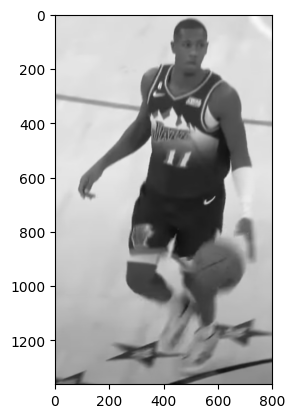

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def load_image_for_visualization(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=1)
    image = tf.image.grayscale_to_rgb(image)
    image = image.numpy().astype(np.uint8)
    return image

plt.imshow(load_image_for_visualization(row_1[0]))


Image dimensions: 802 1362
Original bounding box coordinates: 966 408 987 429
Scaled bounding box coordinates: 966 408 987 429


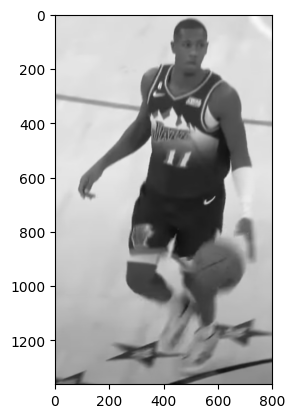

In [31]:
import matplotlib.patches as patches

# Load the image using your provided method
im = load_image_for_visualization(row_1[0])
fig, ax = plt.subplots()
ax.imshow(im)

im_height, im_width, _ = im.shape 
print("Image dimensions:", im_width, im_height)

original_width = 720
original_height = 1280

x1, y1, x2, y2 = [int(v) for v in row_1[2:6]]
print("Original bounding box coordinates:", x1, y1, x2, y2)

#x1 = x1 * (im_width / original_width)
#x2 = x2 * (im_width / original_width)

#y1 = y1 * (im_height / original_height)
#y2 = y2 * (im_height / original_height)



print("Scaled bounding box coordinates:", x1, y1, x2, y2)

width = x2 - x1
height = y2 - y1

rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')

ax.add_patch(rect)

plt.show()
